In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [4]:
cleaned_train_review = pd.read_csv('caches/cleaned_train_reviews_wordlist_nostopwords.csv', header=0, quoting=3)

In [5]:
count_vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)

In [6]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)

In [7]:
train_set_count = count_vectorizer.fit_transform(cleaned_train_review['review']).toarray()
train_set_tfidf = tfidf_vectorizer.fit_transform(cleaned_train_review['review']).toarray()
train_set_labels = cleaned_train_review['sentiment']

In [8]:
count_vocab = count_vectorizer.get_feature_names()

In [9]:
tfidf_vocab = tfidf_vectorizer.get_feature_names()

In [10]:
for a, b in zip(count_vocab, tfidf_vocab):
    if a != b:
        print('vocabulary not totally same!!!')

In [12]:
train_set_features = train_set_count * train_set_tfidf

In [14]:
dist = np.sum(train_set_features, axis=0)

In [15]:
for tag, count in list(zip(count_vocab, dist))[:20]:
    print(tag, count)

abandoned 20.0253812955
abc 35.6192611102
abilities 12.3394569279
ability 45.0090040571
able 107.588988378
abraham 16.139973163
absence 14.7326311212
absent 9.92997677223
absolute 40.6642365115
absolutely 138.51905566
absurd 38.631649907
abuse 25.5566014087
abusive 11.205418473
abysmal 13.8881353105
academy 41.2049132517
accent 56.2079213884
accents 28.9800150152
accept 34.9092780446
acceptable 17.2773561381
accepted 18.0121362855


In [16]:
rf = RandomForestClassifier(n_estimators=100)

In [17]:
gnb = GaussianNB()

In [18]:
lr = LogisticRegression()

In [20]:
from roc_plot import roc_plot_nocv

start training and validating...
RandomForestClassifier done
GaussianNB done
LogisticRegression done


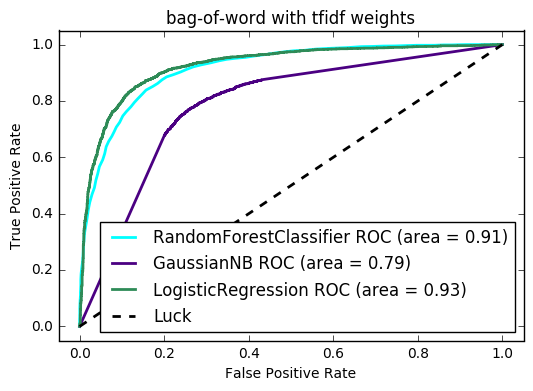

In [21]:
aucs = roc_plot_nocv(classifiers=[rf, gnb, lr], X=train_set_features, y=train_set_labels, plot_title="bag-of-word with tfidf weights")